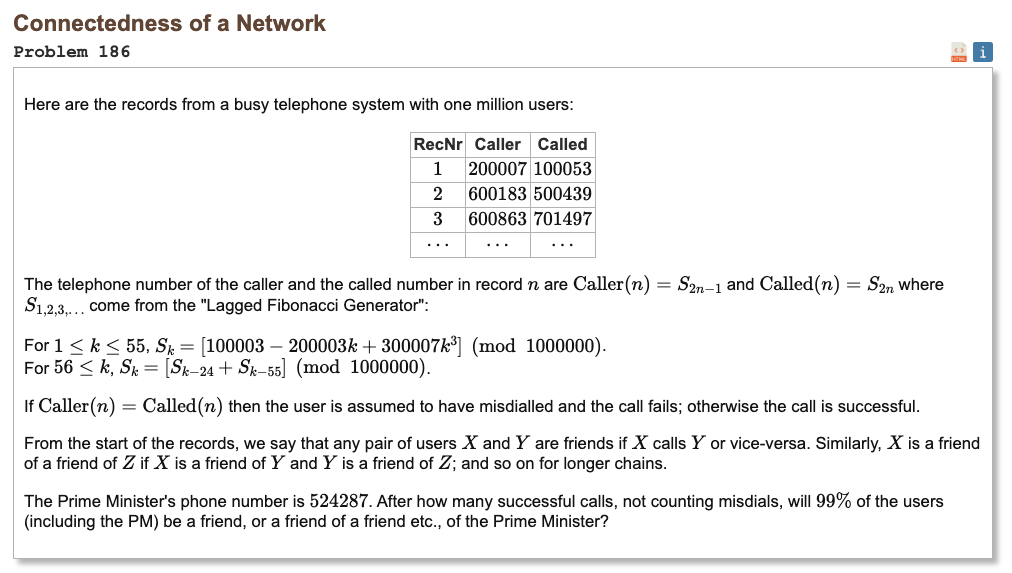

## Initial approach

* generate a stream of pseudo random numbers with the given lagged fibonacci rules
* take the numbers in pairs, first is caller, second is called, both in the range 0 to 999999
* ignore pairs where caller equals called, these are misdials and do not count
* keep a union find structure over the one million users to connect caller and called on each successful call
* always track the size of the connected component that contains the prime minister, user 524287
* stop as soon as this component reaches at least 990000 users, which is 99 percent of all users
* report how many successful calls were needed when this condition is first met

In [1]:
def s_generator():
    s = [0] * 55
    k = 1
    while True:
        if k <= 55:
            val = (100003 - 200003 * k + 300007 * (k ** 3)) % 1000000
            s[k - 1] = val
        else:
            val = (s[(k - 25) % 55] + s[(k - 56) % 55]) % 1000000
            s[(k - 1) % 55] = val
        yield val
        k += 1

def euler186():
    n_users = 1000000
    pm = 524287
    parent = list(range(n_users))
    size = [1] * n_users

    def find(x):
        while parent[x] != x:
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x

    def union(a, b):
        ra = find(a)
        rb = find(b)
        if ra == rb:
            return size[ra]
        if size[ra] < size[rb]:
            ra, rb = rb, ra
        parent[rb] = ra
        size[ra] += size[rb]
        return size[ra]

    gen = s_generator()
    successful = 0
    target = 990000
    while True:
        caller = next(gen)
        called = next(gen)
        if caller == called:
            continue
        successful += 1
        union(caller, called)
        if size[find(pm)] >= target:
            return successful

In [2]:
%%time

result = euler186()
print("Result:", result)

Result: 2325629
CPU times: user 1.76 s, sys: 13.9 ms, total: 1.77 s
Wall time: 1.77 s
